# Intro to Data Visualization with Matplotlib

Author: Emmanuel Rodriguez

https://emmanueljrodriguez.com/

Date: 12 May 2022

## Data to be explored: World Development Indicators (WDI)

https://datatopics.worldbank.org/world-development-indicators/?msclkid=905295b0cef211eca247786f37737c73

## Step 1: Initial exploration of the dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'C:\Users\ejoaq\OneDrive\1 My_Notebook\2 Entrepreneurship and Work\1 Teaching\1 National University\1 ANA 500 - Python for Data Science\My Notebooks - from edX course\WDI_csv\WDIData.csv')
# Prefix with 'r' to produce raw string
data.shape

(384370, 67)

Let's explore what the data holds.

In [3]:
data.head(10) # Use the head() method to view the headers of n rows

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.936004,17.337896,17.687093,18.140971,18.491344,18.825520,19.272212,19.628009,NaN,NaN
1,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,6.499471,6.680066,6.859110,7.016238,7.180364,7.322294,7.517191,7.651598,NaN,NaN
2,Africa Eastern and Southern,AFE,Access to clean fuels and technologies for coo...,EG.CFT.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,37.855399,38.046781,38.326255,38.468426,38.670044,38.722783,38.927016,39.042839,NaN,NaN
3,Africa Eastern and Southern,AFE,Access to electricity (% of population),EG.ELC.ACCS.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,31.794160,32.001027,33.871910,38.880173,40.261358,43.061877,44.270860,45.803485,NaN,NaN
4,Africa Eastern and Southern,AFE,"Access to electricity, rural (% of rural popul...",EG.ELC.ACCS.RU.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.663502,17.633986,16.464681,24.531436,25.345111,27.449908,29.641760,30.404935,NaN,NaN
5,Africa Eastern and Southern,AFE,"Access to electricity, urban (% of urban popul...",EG.ELC.ACCS.UR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,67.112206,66.283426,67.080235,69.132292,70.928567,71.866136,73.332842,73.942949,NaN,NaN
6,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.FE.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.MA.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Africa Eastern and Southern,AFE,Account ownership at a financial institution o...,FX.OWN.TOTL.OL.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


This is a three-dimensional dataset, where the dimensions are: country, indicator, and year.

### How many unique country names are there?

In [4]:
countries = data['Country Name'].unique().tolist()
print(len(countries))
print(type(countries))

266
<class 'list'>


In [5]:
# For a quick sanity check, cross-check the number of country codes with the number of countries:
countryCodes = data['Country Code'].unique().tolist()
print(len(countryCodes))
print(type(countryCodes))

266
<class 'list'>


### How many indicators are there?

In [6]:
indicators = data['Indicator Name'].unique().tolist()
len(indicators)

1445

In [7]:
# List environment variables that have been created so far:
%whos

Variable       Type         Data/Info
-------------------------------------
countries      list         n=266
countryCodes   list         n=266
data           DataFrame                           Co<...>384370 rows x 67 columns]
indicators     list         n=1445
np             module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd             module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt            module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
random         module       <module 'random' from 'C:<...>aconda3\\lib\\random.py'>


### How many years of data do we have?

In [8]:
years = data.columns[4:-1]
len(years)

62

In [9]:
print(type(years))
print(years.shape)

<class 'pandas.core.indexes.base.Index'>
(62,)


In [10]:
# Convert index to list:
years = years.tolist()
print(len(years))
print(type(years))

62
<class 'list'>


### Range of years:

In [11]:
print(min(years), " to ", max(years))

1960  to  2021


## Step 2: Basic plotting with Matplotlib, Part 1

### Country and indicator to explore:

USA and CO2 emissions per capita

In [12]:
# Create and set variables to hold indicator and country
hist_indicator = 'CO2 emissions (metric'
hist_country = 'USA'

# Setup two masks (or filters):
mask1 = data['Indicator Name'].str.contains(hist_indicator, regex = False) # Set the regular expression parameter to False
# to treat the string argument as a literal string.
mask2 = data['Country Code'].str.contains(hist_country)

# Create and set a DataFrame called stage:
stage = data[mask1 & mask2]
print(type(stage))

<class 'pandas.core.frame.DataFrame'>


In [13]:
stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875,NaN,NaN,NaN,NaN


### Revised range of years:

In [14]:
print(min(years), " to ", max(years))

1960  to  2021


### Handle missing data

In [15]:
# Drop columns with NaN values:
stage = stage.dropna(axis = 1) # Set axis parameter to 1 to drop columns with NaN, set it to 0 to drop rows with NaN

In [16]:
stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,19.409229,19.005736,19.025082,19.238109,19.280611,19.253938,...,16.818868,17.434196,16.599404,15.771145,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875


### Plot indicator over time using Matplotlib

In [17]:
# Get the years
years = stage.columns[4:].tolist()

print(len(years))
print(type(years))
print(type(years[0]))

29
<class 'list'>
<class 'str'>


In [18]:
# Get the CO2 values
co2 = stage[years].values # Use the 'years' list to select the corresponding co2 values
print(len(co2))
print(type(co2))
print(type(co2[0]))
print(co2.shape)

1
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(1, 29)


In [19]:
# Change elements in 'years' list from string to integer:
years = [int(years) for years in years]

print(len(years))
print(type(years))
print(type(years[0]))

29
<class 'list'>
<class 'int'>


In [20]:
#years

In [21]:
# Transpose co2 data to allow conversion to scalar
co2 = np.transpose(co2)
print(co2.shape)

(29, 1)


In [22]:
# Change elements in CO2
co2 = [float(co2) for co2 in co2]
print(len(co2))
print(type(co2))
print(type(co2[0]))

29
<class 'list'>
<class 'float'>


### Plot

<BarContainer object of 29 artists>

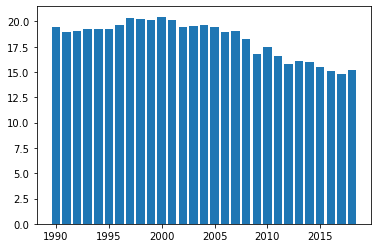

In [23]:
plt.bar(years, co2)

It can be seen that CO2 emissions has dropped over time; the graphic should be more interpretable.

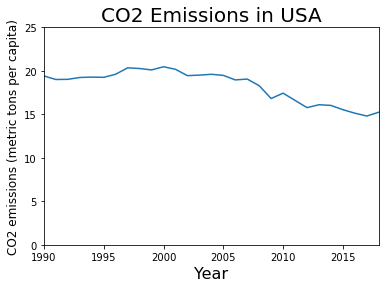

In [24]:
# Switch to a line plot
plt.plot(years, co2)

# Label the axes
plt.xlabel('Year', fontsize = 16) # xlabel is a method on the plot
plt.ylabel(stage['Indicator Name'].iloc[0], fontsize = 12)

# Title
plt.title('CO2 Emissions in USA', fontsize = 20)

# Adjust the axis
plt.axis([1990,2018,0,25]);

# Adjust x-axis ticks
#plt.xticks(np.arange(min(years), max(years), 3));

### Histogram to explore distribution

LaTeX format:

Calculate number of bins using the square-root method

$k = \lceil sqrt(n) \rceil$

Where $\lceil$ and $\rceil$ indicate the celing function (the smallest integer >= input argument), and $n$ is the sample size.

In [25]:
import math
k = math.ceil(math.sqrt(len(co2)))
k

6

Text(0, 0.5, '# of Years')

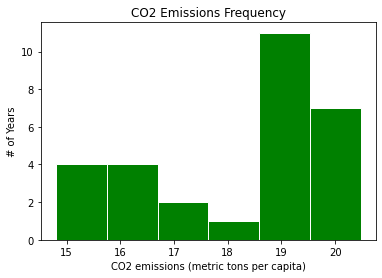

In [26]:
plt.hist(co2, k, facecolor = 'green', edgecolor = 'white')

plt.title('CO2 Emissions Frequency')
plt.xlabel(stage['Indicator Name'].iloc[0])
plt.ylabel('# of Years')
#plt.grid(True)

The USA has several years where its CO2 emissions were 19 metric tons per capita or greater.

### How does the USA CO2 emissions compare to other countries?

In [29]:
%whos

Variable         Type         Data/Info
---------------------------------------
co2              list         n=29
countries        list         n=266
countryCodes     list         n=266
data             DataFrame                           Co<...>384370 rows x 67 columns]
hist_country     str          USA
hist_indicator   str          CO2 emissions (metric
indicators       list         n=1445
k                int          6
mask1            Series       0         False\n1       <...>ngth: 384370, dtype: bool
mask2            Series       0         False\n1       <...>ngth: 384370, dtype: bool
math             module       <module 'math' (built-in)>
np               module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd               module       <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt              module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
random           module       <module 'random' from 'C:<...>aconda3\\lib\\random.py'>

In [30]:
# Extract CO2 emissions for the last year in the data range for all countries via Masking
# Masking - to extract values from an array based on some criterion

hist_indicator = 'CO2 emissions (metric'
hist_year = '2018'

# Create mask
mask1 = data['Indicator Name'].str.contains(hist_indicator, regex=False)

# Create a Pandas Series of only the specified year, query only the specified year
data2018 = data[hist_year]

# Apply mask
co2_2018 = data2018[mask1].dropna(axis=0) # Drop rows that contain NaN, i.e., drop countries that don't have reported data

print(type(co2_2018)) # The type of object, and the class that it's derived from
print(co2_2018.shape) # a tuple of the shape of the underlying data.
print(co2_2018.dtype) # dtype object of the underlying data.
print(co2_2018.ndim) # # of dimensions of the underlying data.
print(co2_2018.size) # # of elements in the underlying data.
print(co2_2018.index) # The index (axis labels) of the Series.
co2_2018.head()

<class 'pandas.core.series.Series'>
(239,)
float64
1
239
Int64Index([   193,   1638,   3083,   4528,   5973,   7418,   8863,  10308,
             11753,  13198,
            ...
            367223, 368668, 370113, 371558, 373003, 374448, 375893, 380228,
            381673, 383118],
           dtype='int64', length=239)


193     0.933541
1638    0.515544
3083    4.438716
4528    5.017034
5973    6.597232
Name: 2018, dtype: float64

To compare how the USA measures up against other countries in terms of CO2 emissions, a histogram will be created with CO2 emissions on the x-axis and number of countries in the y-axis.

I.e.,

plt.hist(co2_2018)

Since 'co2_2018' is a Series with only emissions data and indices (which identifies the country), the index must therefore be tied to the country name. This is the next step.

In [32]:
# The country 'Keys' can be queried using the keys() function, or simply using the .index method
#countryKeys = co2_2018.keys()
#countryKeys

In [33]:
countries = data['Country Name'].loc[co2_2018.index] # Slice into the 'data' DataFrame using the loc attribue, which
# references the explicit index (the assigned index label in the DataFrame), whereas the attribute iloc would reference
# the implicit Python-style index (i.e., the row #, where the array indices start at 0)
countries

193          Africa Eastern and Southern
1638          Africa Western and Central
3083                          Arab World
4528              Caribbean small states
5973      Central Europe and the Baltics
                       ...              
374448                     Venezuela, RB
375893                           Vietnam
380228                       Yemen, Rep.
381673                            Zambia
383118                          Zimbabwe
Name: Country Name, Length: 239, dtype: object

In [34]:
# Construct a new DataFrame
d = {'Country': countries, 'CO2 emissions per capita, 2018': co2_2018} # Dictionary, used to store data values in key:value
# pairs
df = pd.DataFrame(d)

print(len(df))
print(df.shape)
df

239
(239, 2)


,Country,"CO2 emissions per capita, 2018"
193,Africa Eastern and Southern,0.933541
1638,Africa Western and Central,0.515544
3083,Arab World,4.438716
4528,Caribbean small states,5.017034
5973,Central Europe and the Baltics,6.597232
...,...,...
374448,"Venezuela, RB",4.782755
375893,Vietnam,2.698806
380228,"Yemen, Rep.",0.326682
381673,Zambia,0.446065


In [42]:
USA_emissions = df[df['Country'] == 'United States'] # Slice out the row by direct-masking with a boolean expression
# Recall: Indexing refers to columns, slicing refers to rows.
# Direct masking operations are interpreted row-wise rather than column-wise.
USA_emissions
#USA_emissions.iloc[0,1] # Extract the value
#USA_emissions.values[0,1] # Also extracts the value

,Country,"CO2 emissions per capita, 2018"
368668,United States,15.240875


What are the countries with the highest emissions?

In [47]:
highestCO2_countries = df[df['CO2 emissions per capita, 2018'] > 20]
highestCO2_countries

,Country,"CO2 emissions per capita, 2018"
224168,Kuwait,21.622724
300753,Qatar,32.415639
365778,United Arab Emirates,20.797498


In [48]:
# Where is Mexico in all of this?
Mx_emissions = df[df['Country'] == 'Mexico']
Mx_emissions

,Country,"CO2 emissions per capita, 2018"
254513,Mexico,3.741478


Text(0.5, 1.0, 'Histogram of CO2 Emissions per Capita in 2018')

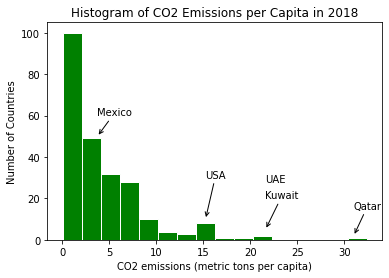

In [54]:
# Histogram of country emissions per capita

# Create just a figure and only one subplot
fig, ax = plt.subplots() # subplots returns a tuple with the figure, axis attributes
# A tuple is a type of Python array. It is a collection which is ordered and unchangeable, whereas a list is ordered and
# changeable. 

# Even though only one plot is being created, subplots() function is used because this function returns two arguments
# figure and axes.Axes, the latter will be used in creating annotations.

ax.annotate("USA",
           xy=(USA_emissions.iloc[0,1], 10), xycoords='data',
           xytext=(USA_emissions.iloc[0,1],30), textcoords='data',
           arrowprops=dict(arrowstyle="->",
                          connectionstyle="arc3"),
           )

ax.annotate("Kuwait",
           xy=(highestCO2_countries.iloc[0,1], 5), xycoords = 'data',
           xytext=(highestCO2_countries.iloc[0,1], 20), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                           connectionstyle="arc3"),
           )

ax.annotate("UAE",
           xy=(highestCO2_countries.iloc[0,1], 5), xycoords = 'data',
           xytext=(highestCO2_countries.iloc[0,1], 28), textcoords='data',
           )

ax.annotate("Qatar",
           xy=(highestCO2_countries.iloc[1,1]-1.4, 2), xycoords = 'data',
           xytext=(highestCO2_countries.iloc[1,1]-1.4, 15), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
           )
# Subtracting 1.4 from the Qatar value to shift the text to the left.

ax.annotate("Mexico",
           xy=(Mx_emissions.iloc[0,1], 50), xycoords = 'data',
           xytext=(Mx_emissions.iloc[0,1], 60), textcoords='data',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3"),
           )
            
# Note that 'data' in xycoords and textcoords is simply the option assigned to those two parameters, it is not referring
# to the Pandas dataframe 'data' -- see the doc.
                             
# # of bins
k = math.ceil(math.sqrt(len(co2_2018)))

# Histogram                             
plt.hist(co2_2018, k, facecolor = 'green', edgecolor = 'white')

# Labels
plt.xlabel(stage['Indicator Name'].iloc[0]) # Query column 'Indicator Name' in the stage DataFrame, and extract the location
# of element 0 by using the implicit index 0 (Pthon-style index, where 0 references element 1 in the array)
plt.ylabel('Number of Countries')
plt.title('Histogram of CO2 Emissions per Capita in 2018')                             

## Step 3: Data Science

### Basic plotting with Matplotlib, part 2

### Relationship between GDP and CO2 emissions in USA

What is GDP? -- A monetary measure of the market value of all the final goods and services produced by a country in a specific time period.

In [55]:
# Query GDP per capita for the US
hist_indicator = 'GDP per capita (constant 2015'
hist_country = 'USA'

mask1 = data['Indicator Name'].str.contains(hist_indicator, regex=False)
mask2 = data['Country Code'].str.contains(hist_country)

gdp_stage = data[mask1 & mask2]
gdp_stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
368946,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,19135.268182,19253.547329,20116.235124,20701.269947,21599.818705,22696.678583,...,54604.130054,55574.356825,56863.371496,57418.933846,58387.775808,59821.592274,60836.771454,58203.379006,NaN,NaN


In [56]:
# Handle missing data
# Drop columns that contain NaN elements
gdp_stage = gdp_stage.dropna(axis=1)
gdp_stage.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
368946,United States,USA,GDP per capita (constant 2015 US$),NY.GDP.PCAP.KD,19135.268182,19253.547329,20116.235124,20701.269947,21599.818705,22696.678583,...,53190.231121,53989.24834,54604.130054,55574.356825,56863.371496,57418.933846,58387.775808,59821.592274,60836.771454,58203.379006


First, what is the trend of GDP over time for the USA?

### Line plot

In [94]:
# Line plot

# Get the years
gdp_years = gdp_stage.columns[4:].tolist()
print(len(gdp_years))

# Range:
print("Range:", min(gdp_years), "to", max(gdp_years))

61
Range: 1960 to 2020


In [95]:
# Get the GDP values
gdp = gdp_stage[gdp_years].values # Use the years list to slice into the DataFrame, by using the values method, the output
# of the expression will be a Numpy array

print(type(gdp))
print(len(gdp))
print(gdp.shape)

<class 'numpy.ndarray'>
1
(1, 61)


In [96]:
# To plot, both x and y must have the same first dimension, therefore gdp should be transposed
gdp = gdp.T
print(gdp.shape)

(61, 1)


In [97]:
# Convert gdp years list to an integer list
gdp_years = [int(gdp_years) for gdp_years in gdp_years] # Need some clarification with this expression

In [99]:
print(type(gdp_years))
print(type(gdp_years[0]))
#gdp_years

<class 'list'>
<class 'int'>


Text(0.5, 1.0, 'US GDP per Capita')

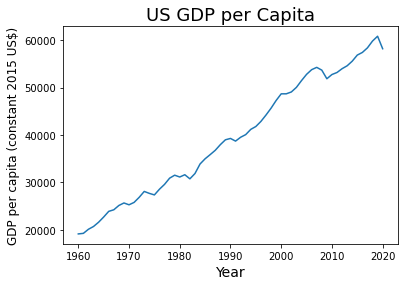

In [100]:
plt.plot(gdp_years,gdp)

plt.xlabel('Year', fontsize=14)
plt.ylabel(gdp_stage['Indicator Name'].iloc[0], fontsize=12)
plt.title('US GDP per Capita', fontsize=18)

Is there a correlation between GDP per capita and CO2 emissions?

### Scatter plot to evalute GDP against CO2 emissions per capita

Ensure time frames for both indicators match, as a scatterplot requires that the length of the arrays be equal.

In [101]:
print("GDP range: ", min(gdp_years), "to ", max(gdp_years))
print("CO2 emissions range: ", min(years), "to ", max(years))

GDP range:  1960 to  2020
CO2 emissions range:  1990 to  2018


In [102]:
# Truncate the gdp_stage on the left and right to match the CO2 emissions indicator range

gdp_stage_trunc = gdp_stage.loc[:,'1990':'2018'] # Slice with column labels; when using .loc with slices, if both the start
# and stop labels are present in the index, then elements located between the two (inclusive) are returned
gdp_stage_trunc.head()

,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
368946,39278.59535,38715.261688,39526.970805,40082.604815,41189.238357,41794.192213,42869.24717,44212.167041,45658.136598,47282.284676,...,51869.706308,52759.998081,53190.231121,53989.24834,54604.130054,55574.356825,56863.371496,57418.933846,58387.775808,59821.592274


In [103]:
co2_stage = stage
co2_stage

,Country Name,Country Code,Indicator Name,Indicator Code,1990,1991,1992,1993,1994,1995,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
368668,United States,USA,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,19.409229,19.005736,19.025082,19.238109,19.280611,19.253938,...,16.818868,17.434196,16.599404,15.771145,16.102958,16.026379,15.535342,15.131747,14.805882,15.240875


In [104]:
# Get values from gdp_stage and co2_stage

gdp_values = gdp_stage_trunc.values.T # To plot, the trailing dim must be 1, so a transpose is in order
print(gdp_values.shape)

co2_values = co2_stage.loc[:,'1990':].values.T
print(co2_values.shape)

(29, 1)
(29, 1)


Text(0.5, 1.0, 'CO2 Emissions vs. GDP per Capita')

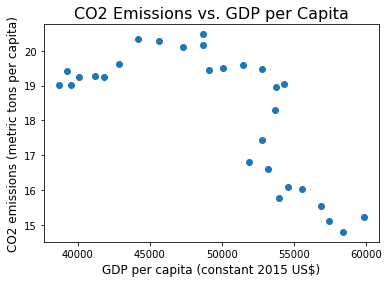

In [107]:
# Scatter plot
plt.scatter(gdp_values, co2_values)

plt.xlabel(gdp_stage['Indicator Name'].iloc[0], fontsize=12)
plt.ylabel(stage['Indicator Name'].iloc[0], fontsize=12)
plt.title('CO2 Emissions vs. GDP per Capita', fontsize=16)

There is an apparent negative correlation between the two indicators. A more objective conclusion can be drawn by calculating the correlation.

In [116]:
# Compute correlation using the .corr method

#print(type(gdp_values))
#print(type(co2_values))

# Convert both arrays floating point lists (Series argument must be 1-dimensional, so the 29x1 array is converted to a list),
# then to Pandas Series, the two Series will then be used to create a dictionary, 
# then the dictionary to create a DataFrame. The DataFrame calls the .corr method.
gdp_values = [float(gdp_values) for gdp_values in gdp_values]
co2_values = [float(co2_values) for co2_values in co2_values]
print(type(gdp_values))

# Pandas Series
gdp_Series = pd.Series(gdp_values)
co2_Series = pd.Series(co2_values)

# Dictionary
d = {'GDP':gdp_Series, 'CO2':co2_Series}
newdf = pd.DataFrame(d)
newdf

<class 'list'>


,GDP,CO2
0,39278.595350,19.409229
1,38715.261688,19.005736
2,39526.970805,19.025082
3,40082.604815,19.238109
4,41189.238357,19.280611
5,41794.192213,19.253938
6,42869.247170,19.611090
7,44212.167041,20.347873
8,45658.136598,20.266880
9,47282.284676,20.105720


In [117]:
# Correlation
newdf.corr(method='pearson')

,GDP,CO2
GDP,1.000000,-0.703146
CO2,-0.703146,1.000000


In [118]:
# Alternatively, compute corr using the Series.corr method
gdp_Series.corr(co2_Series, method='pearson')

-0.7031462424574285

In the correlation matrix, the main diagonal represents each variable being correlated with itself, hence yielding a value of 1. 
The other diagonal represents the correlation between the two variables, a values of -0.70 indicates a negative and relatively strong correlation. E.g., as CO2 emissions decrease, GDP per capita increases - it is critical to note that this conclusion is based off a relatively short time-frame (1990 - 2018, 28 years) and in order to make this claim substantial a longer time period (>50 years) should be sampled.

In [119]:
# Some useful shell commands

#!echo "Printing from the shell" # echo is like print() in Python, only coming from the shell
#%pwd # Print working directory
#%history -n 1-4 # Access a batch of previous inputs at once

## Other Matplotlib plots:

https://matplotlib.org/stable/plot_types/index.html